<a href="https://colab.research.google.com/github/angie-art/angie-art.github.io/blob/main/Altschool_project__Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 03-17-2020.csv to 03-17-2020.csv


In [ ]:
import pandas as pd
df = pd.read_csv("03-17-2020.csv")

In [ ]:
## 1a. write a python program to display first five rows
df.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,China,2020-03-17T11:53:10,67799,3111,56003,30.9756,112.2707
1,NaN,Italy,2020-03-17T18:33:02,31506,2503,2941,41.8719,12.5674
2,NaN,Iran,2020-03-17T15:13:09,16169,988,5389,32.4279,53.6880
3,NaN,Spain,2020-03-17T20:53:02,11748,533,1028,40.4637,-3.7492
4,NaN,Germany,2020-03-17T18:53:02,9257,24,67,51.1657,10.4515


In [ ]:
##1b. Write a Python program to print the dataset information and check the missing values.
df.info()
df.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  154 non-null    object 
 1   Country/Region  312 non-null    object 
 2   Last Update     312 non-null    object 
 3   Confirmed       312 non-null    int64  
 4   Deaths          312 non-null    int64  
 5   Recovered       312 non-null    int64  
 6   Latitude        309 non-null    float64
 7   Longitude       309 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 19.6+ KB


,0
Province/State,158
Longitude,3
Latitude,3
Country/Region,0
Confirmed,0
Last Update,0
Recovered,0
Deaths,0


In [ ]:
df.columns

Index(['Province/State', 'Country/Region', 'Last Update', 'Confirmed',
       'Deaths', 'Recovered', 'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
##2. Write a Python program to get the latest number of confirmed, deaths, recovered and active cases of Novel Coronavirus (COVID-19) Country wise.
# STEP 1: Fill missing values (if any)
df['Confirmed'] = df['Confirmed'].fillna(0)
df['Deaths'] = df['Deaths'].fillna(0)
df['Recovered'] = df['Recovered'].fillna(0)

# STEP 2: Create the Active column
df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']

# STEP 3: Group by Country/Region and sum values
country_summary = df.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

# STEP 4: Sort (optional)
country_summary = country_summary.sort_values(by='Confirmed', ascending=False)

# STEP 5: Display result
print("Latest country-wise COVID-19 summary:")
country_summary.head(20)  # Show top 20 countries

Latest country-wise COVID-19 summary:


,Country/Region,Confirmed,Deaths,Recovered,Active
30,China,81058,3230,68798,9030
74,Italy,31506,2503,2941,26062
70,Iran,16169,988,5389,9792
140,Spain,11748,533,1028,10187
54,Germany,9257,24,67,9166
83,"Korea, South",8320,81,1407,6832
50,France,7683,148,12,7523
158,US,6421,108,17,6296
146,Switzerland,2700,40,4,2656
161,United Kingdom,1954,217,53,1684


In [ ]:
#3. Write a Python program to get the latest number of confirmed, deaths and recovered people of Novel Coronavirus (COVID-19) cases Country/Region – Province/State wise.
df_statewise = df[['Country/Region', 'Province/State', 'Confirmed', 'Deaths', 'Recovered']]
df_statewise


,Country/Region,Province/State,Confirmed,Deaths,Recovered
0,China,Hubei,67799,3111,56003
1,Italy,NaN,31506,2503,2941
2,Iran,NaN,16169,988,5389
3,Spain,NaN,11748,533,1028
4,Germany,NaN,9257,24,67
...,...,...,...,...,...
307,United Kingdom,Wales,0,5,0
308,Nauru,NaN,0,0,0
309,New Zealand,Niue,0,0,0
310,Tuvalu,NaN,0,0,0


In [ ]:
#4.Write a Python program to get the Chinese province-wise cases of confirmed, deaths, and recovered cases of Novel Coronavirus (COVID-19).
china_data = df[df['Country/Region'] == 'China']
china_summary = china_data[['Province/State', 'Confirmed', 'Deaths', 'Recovered']]
china_summary = china_summary.sort_values(by='Confirmed', ascending=False)
china_summary

,Province/State,Confirmed,Deaths,Recovered
0,Hubei,67799,3111,56003
12,Guangdong,1364,8,1307
14,Henan,1273,22,1250
16,Zhejiang,1232,1,1216
19,Hunan,1018,4,1014
20,Anhui,990,6,984
22,Jiangxi,935,1,934
24,Shandong,761,7,746
27,Jiangsu,631,0,631
28,Chongqing,576,6,570


In [ ]:
#5. Write a Python program to get the latest country-wise death cases of Novel Coronavirus (COVID-19)
country_deaths = df.groupby('Country/Region')['Deaths'].sum().reset_index()
country_deaths = country_deaths.sort_values(by='Deaths', ascending=False)
country_deaths

,Country/Region,Deaths
30,China,3230
74,Italy,2503
70,Iran,988
140,Spain,533
161,United Kingdom,217
...,...,...
163,Uzbekistan,0
164,Venezuela,0
165,Vietnam,0
166,Winter Olympics 2022,0


In [ ]:
#6. Write a Python program to list countries with no cases of Novel Coronavirus (COVID-19) recovered.
recovered_by_country = df.groupby('Country/Region')['Recovered'].sum().reset_index()
no_recovery = recovered_by_country[recovered_by_country['Recovered'] == 0]
print(no_recovery['Country/Region'].to_list())

['Albania', 'Antarctica', 'Antigua and Barbuda', 'Aruba', 'Barbados', 'Benin', 'Bhutan', 'Bolivia', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Cameroon', 'Central African Republic', 'Chile', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', 'Cuba', 'Cyprus', 'Dominican Republic', 'Ecuador', 'Equatorial Guinea', 'Eswatini', 'Ethiopia', 'French Guiana', 'Gabon', 'Ghana', 'Greenland', 'Guadeloupe', 'Guam', 'Guatemala', 'Guernsey', 'Guinea', 'Guyana', 'Holy See', 'Honduras', 'Iceland', 'Jersey', 'Kazakhstan', 'Kenya', 'Kiribati', 'Korea, North', 'Kosovo', 'Liberia', 'Liechtenstein', 'Luxembourg', 'Malaysia', 'Maldives', 'Martinique', 'Mauritania', 'Mayotte', 'Monaco', 'Mongolia', 'Montenegro', 'Namibia', 'Nauru', 'New Zealand', 'Nigeria', 'Palau', 'Panama', 'Paraguay', 'Puerto Rico', 'Republic of the Congo', 'Reunion', 'Rwanda', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Seychelles', 'Slovakia', 'Slovenia', 'Somalia', 'South Africa', 'Sudan', 'Summer Olympics 2020', 'Suriname',

In [ ]:
#7. Write a Python program to list countries with all cases of Novel Coronavirus (COVID-19) died
country_data = df.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
all_died = country_data[(country_data['Confirmed'] == country_data['Deaths']) & (country_data['Recovered'] == 0)]
print(all_died['Country/Region'].to_list())

['Antarctica', 'Guernsey', 'Jersey', 'Kiribati', 'Korea, North', 'Malaysia', 'Nauru', 'Palau', 'Puerto Rico', 'Republic of the Congo', 'Sudan', 'Summer Olympics 2020', 'Tonga', 'Tuvalu', 'Winter Olympics 2022', 'occupied Palestinian territory']


In [ ]:
#8. Write a Python program to list countries with all cases of Novel Coronavirus (COVID-19) recovered
country_data = df.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
all_recovered = country_data[(country_data['Confirmed'] == country_data['Recovered']) & (country_data['Deaths'] == 0)]
print(all_recovered['Country/Region'].to_list())

['Antarctica', 'Guernsey', 'Jersey', 'Kiribati', 'Korea, North', 'Malaysia', 'Nauru', 'Nepal', 'Palau', 'Puerto Rico', 'Republic of the Congo', 'Summer Olympics 2020', 'Tonga', 'Tuvalu', 'Winter Olympics 2022', 'occupied Palestinian territory']


In [ ]:
#9. Write a Python program to get the top 10 countries data (Last Update, Country/Region, Confirmed, Deaths, Recovered) of Novel Coronavirus (COVID-19).
# Grouping and summing data per country
summary = df.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

# Getting the most recent Last_Update per country
Latest_Update = df.groupby('Country/Region')['Last Update'].max().reset_index()

# Merge both to get the latest update alongside totals
merged = pd.merge(summary, Latest_Update, on='Country/Region')

# Sorting and picking top 10 countries
top10 = merged.sort_values(by='Confirmed', ascending=False).head(10)

# Reordering columns for clarity
top10 = top10[['Last Update', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered']]

# Displaying result
print(top10)

             Last Update  Country/Region  Confirmed  Deaths  Recovered
30   2020-03-17T12:13:13           China      81058    3230      68798
74   2020-03-17T18:33:02           Italy      31506    2503       2941
70   2020-03-17T15:13:09            Iran      16169     988       5389
140  2020-03-17T20:53:02           Spain      11748     533       1028
54   2020-03-17T18:53:02         Germany       9257      24         67
83   2020-03-17T10:33:03    Korea, South       8320      81       1407
50   2020-03-17T19:13:08          France       7683     148         12
158  2020-03-17T23:53:03              US       6421     108         17
146  2020-03-17T16:33:04     Switzerland       2700      40          4
161  2020-03-17T15:13:09  United Kingdom       1954     217         53


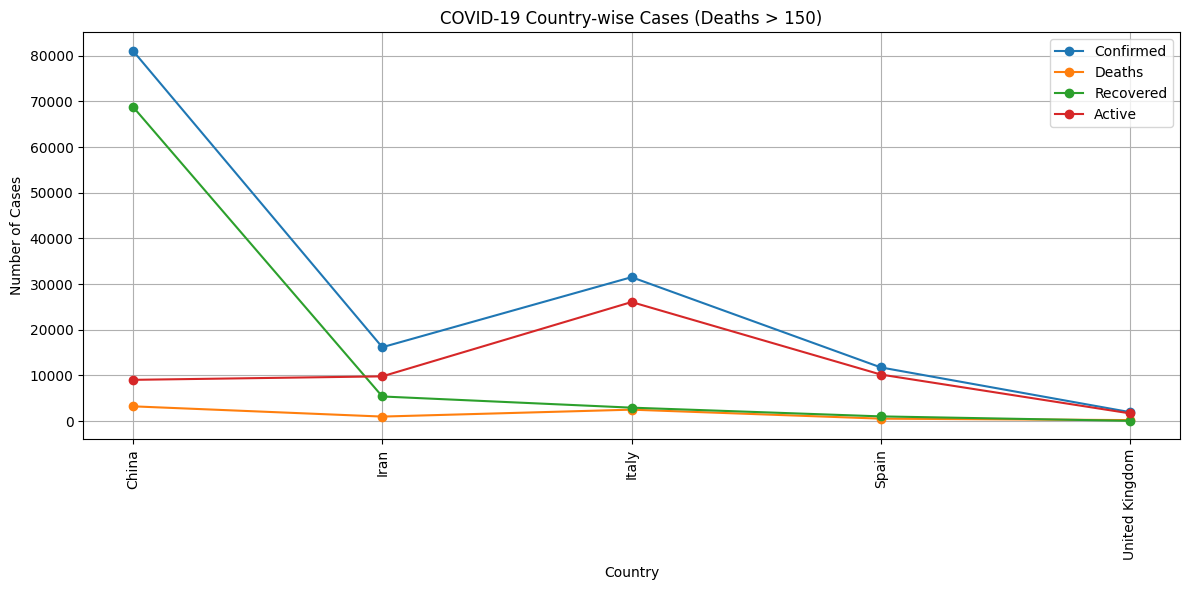

In [ ]:
#10.Write a Python program to create a line plot of total deaths, confirmed, recovered, and active cases country-wise where deaths are greater than 150.
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("03-17-2020.csv")

# Group by Country/Region and sum the values
grouped = df.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered']].sum()

# Create Active column
grouped['Active'] = grouped['Confirmed'] - grouped['Deaths'] - grouped['Recovered']

# Filter countries with Deaths > 150
filtered = grouped[grouped['Deaths'] > 150]

# Plotting
plt.figure(figsize=(12, 6))

plt.plot(filtered.index, filtered['Confirmed'], label='Confirmed', marker='o')
plt.plot(filtered.index, filtered['Deaths'], label='Deaths', marker='o')
plt.plot(filtered.index, filtered['Recovered'], label='Recovered', marker='o')
plt.plot(filtered.index, filtered['Active'], label='Active', marker='o')

plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Number of Cases")
plt.title("COVID-19 Country-wise Cases (Deaths > 150)")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

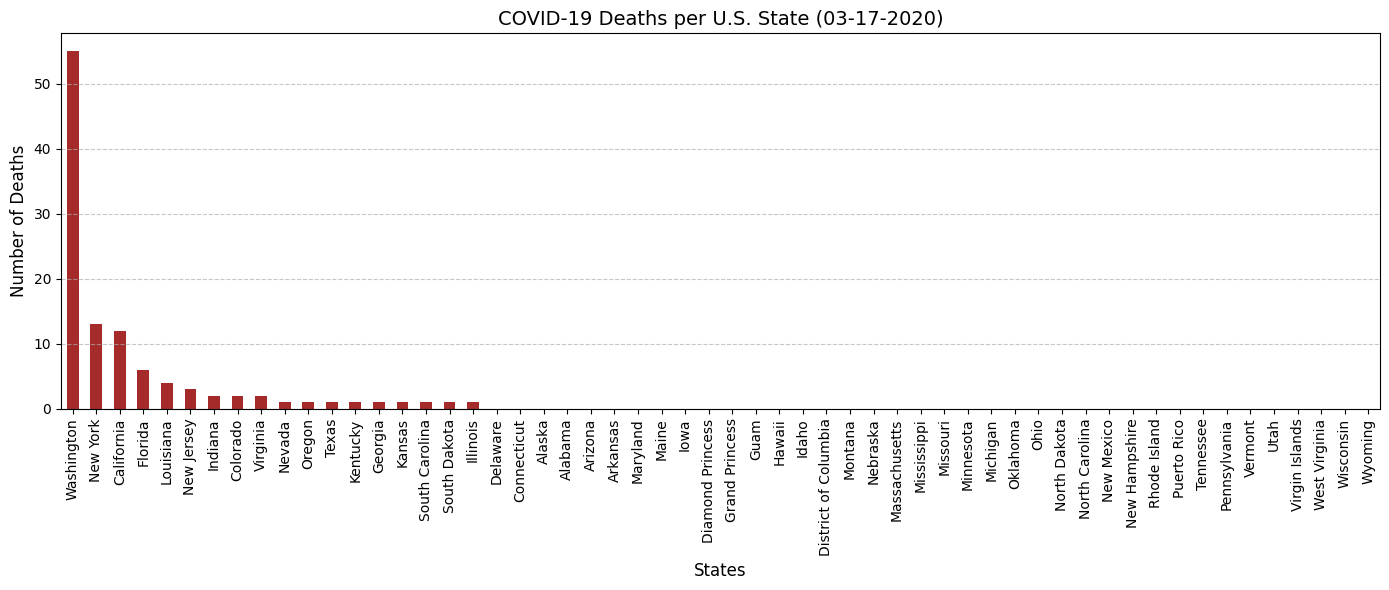

In [ ]:
#11. Plot a bar chart of USA state-wise death cases.
usa_data = df[df['Country/Region'] == 'US']
state_deaths = usa_data.groupby('Province/State')['Deaths'].sum().sort_values(ascending=False)
plt.figure(figsize=(14, 6))
state_deaths.plot(kind='bar', color='brown')

plt.title("COVID-19 Deaths per U.S. State (03-17-2020)", fontsize=14)
plt.xlabel("States", fontsize=12)
plt.ylabel("Number of Deaths", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

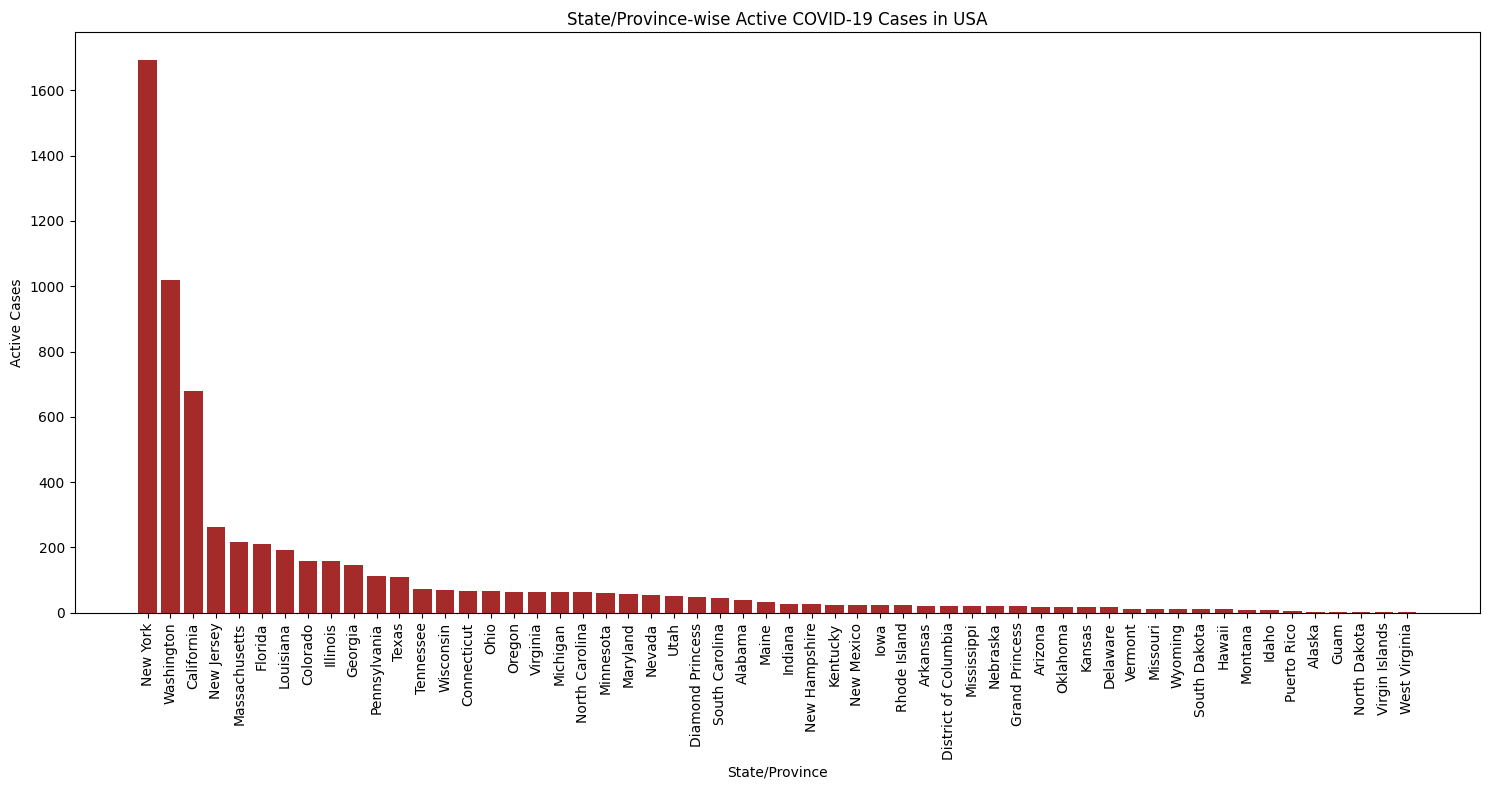

In [ ]:
#12. Write a Python program to visualize the state/province-wise active cases of Novel Coronavirus (COVID-19) in USA.
# Fill missing values (to avoid errors in calculation)
df.fillna(0, inplace=True)

# Filter for United States
usa_df = df[df['Country/Region'] == 'US']

# Group by state/province and calculate totals
state_group = usa_df.groupby('Province/State')[['Confirmed', 'Deaths', 'Recovered']].sum()

# Calculate Active cases
state_group['Active'] = state_group['Confirmed'] - state_group['Deaths'] - state_group['Recovered']

# Sort by Active cases
state_group = state_group.sort_values(by='Active', ascending=False)

# Plotting
plt.figure(figsize=(15, 8))
plt.bar(state_group.index, state_group['Active'], color='brown')
plt.title('State/Province-wise Active COVID-19 Cases in USA')
plt.xlabel('State/Province')
plt.ylabel('Active Cases')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

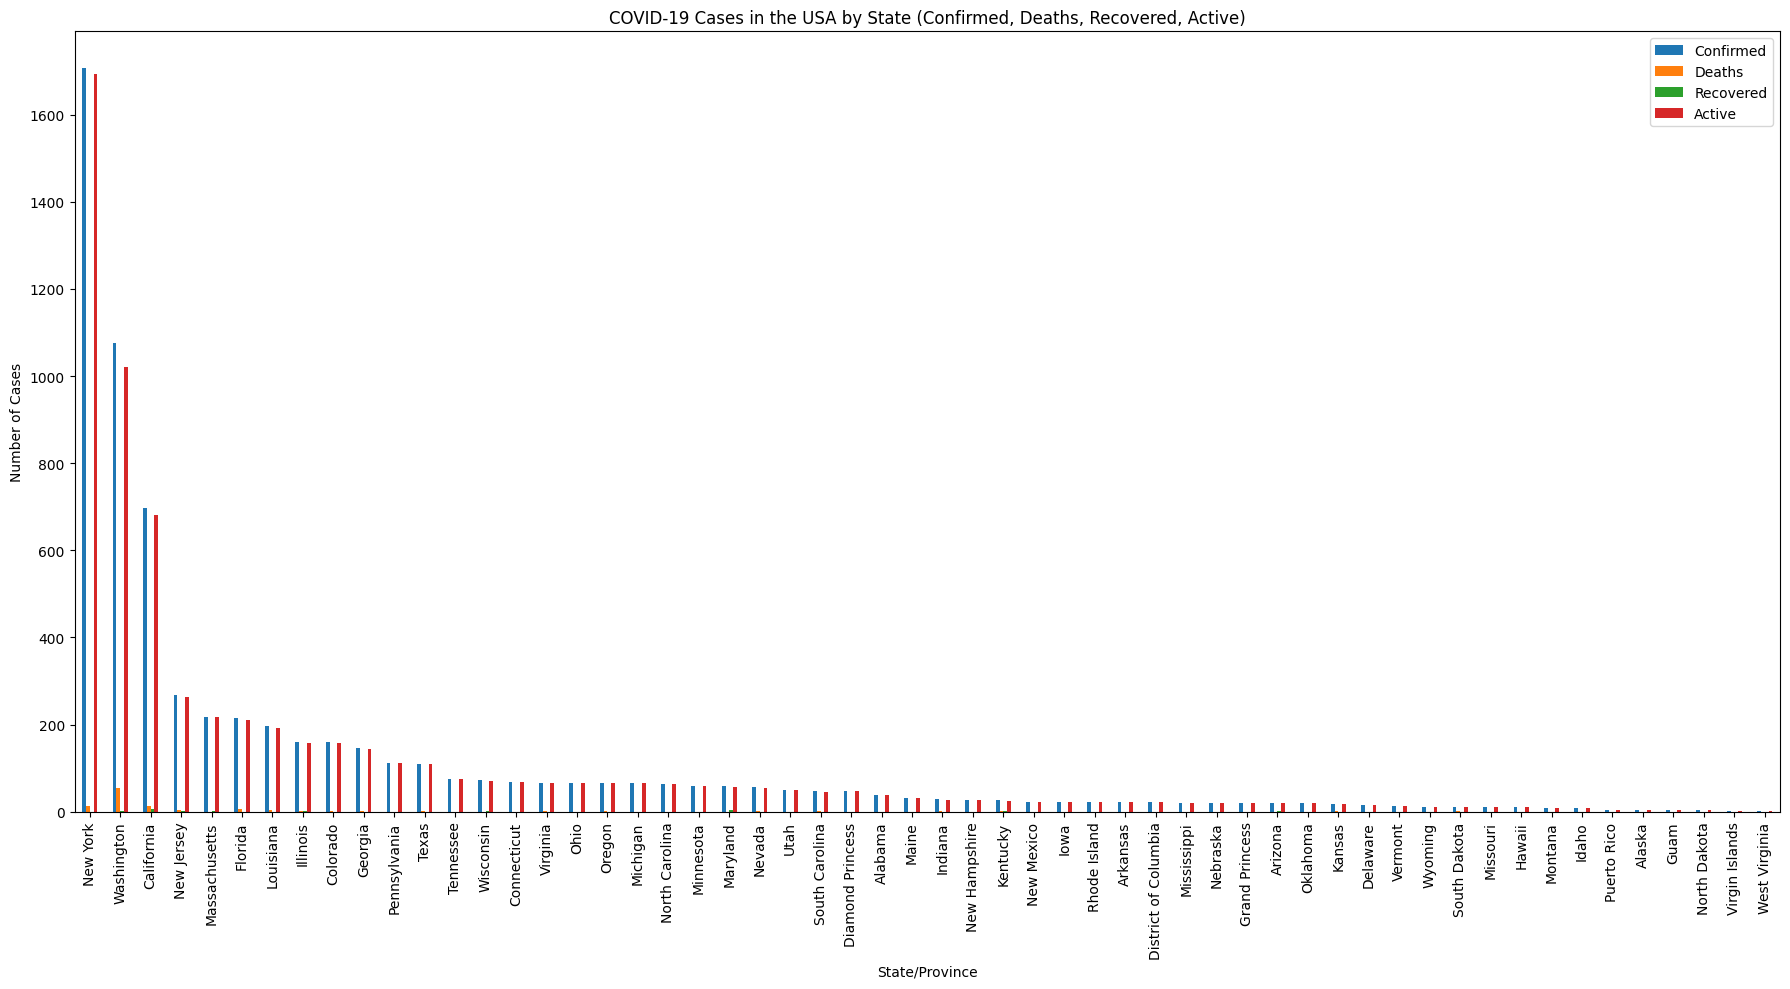

In [ ]:
#13. Write a Python program to visualize the state/province-wise combined number of Confirmed, Deaths, Recovered, and Active Novel Coronavirus (COVID-19) cases in the USA.
df.fillna(0, inplace=True)

# Filter USA data
usa_df = df[df['Country/Region'] == 'US']

# Group by state/province
grouped = usa_df.groupby('Province/State')[['Confirmed', 'Deaths', 'Recovered']].sum()

# Calculate Active cases
grouped['Active'] = grouped['Confirmed'] - grouped['Deaths'] - grouped['Recovered']

# Sort by Confirmed for better visuals
grouped = grouped.sort_values(by='Confirmed', ascending=False)

# Plot
grouped[['Confirmed', 'Deaths', 'Recovered', 'Active']].plot(kind='bar', stacked=False, figsize=(18, 10))

plt.title('COVID-19 Cases in the USA by State (Confirmed, Deaths, Recovered, Active)')
plt.xlabel('State/Province')
plt.ylabel('Number of Cases')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

In [ ]:
##14.Write a Python program to visualize Worldwide Confirmed Novel Coronavirus (COVID-19) cases over time.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


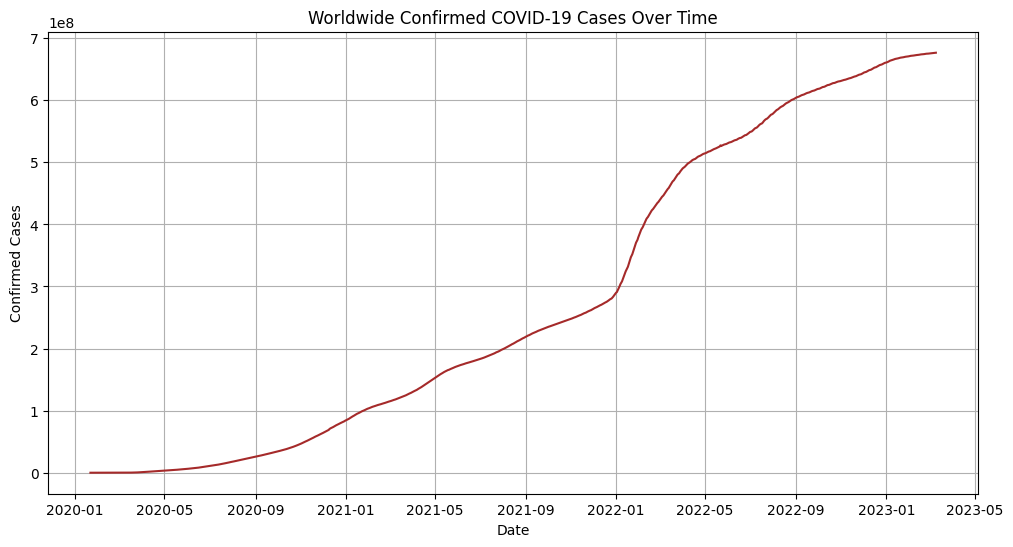

In [ ]:
import os
import pandas as pd

# ✅ Step 1: Correct folder path (after mounting)
folder_path = '/content/drive/MyDrive/csse_covid_19_daily_reports (1)'

# ✅ Step 2: Read and combine all CSVs
all_data = []

for file in os.listdir(folder_path):
    if file.endswith('.csv'):
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        df['Date'] = pd.to_datetime(file.replace('.csv', ''), format='%m-%d-%Y')
        all_data.append(df)

# ✅ Step 3: Concatenate into one DataFrame
combined_df = pd.concat(all_data, ignore_index=True)

# ✅ Step 4: Group by Date and sum Confirmed cases
worldwide_confirmed = (
    combined_df.groupby('Date')['Confirmed']
    .sum()
    .reset_index()
    .sort_values('Date')
)

# ✅ Step 5: Plot (Optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(worldwide_confirmed['Date'], worldwide_confirmed['Confirmed'], color='brown')
plt.title('Worldwide Confirmed COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.grid(True)
plt.show()